**Problem statement**

Create a regression model that predicts the price of a house for sale. 

In [1]:
# Imports:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline

In [2]:
# read in train dataset as housing

housing = pd.read_csv('./datasets/test.csv')

In [3]:
# set up display

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_info_rows', 500)
pd.set_option('display.max_rows', 500)
# idea taken from Jeff Hale

In [4]:
# inspect data

housing.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD


In [5]:
# datatypes

housing.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1         int64
BsmtFin Type 2      object
B

In [6]:
# descriptives

housing.drop(['Id', 'PID'], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
MS SubClass,878.0,58.268793,42.235407,20.0,20.00,50.0,70.00,190.0
Lot Frontage,718.0,69.545961,23.533945,21.0,59.00,68.0,80.00,182.0
Lot Area,878.0,10307.033030,10002.674602,1477.0,7297.25,9446.0,11589.00,215245.0
Overall Qual,878.0,6.050114,1.369065,2.0,5.00,6.0,7.00,10.0
Overall Cond,878.0,5.566059,1.128903,1.0,5.00,5.0,6.00,9.0
Year Built,878.0,1970.492027,30.395895,1880.0,1954.00,1972.0,1999.75,2010.0
Year Remod/Add,878.0,1984.417995,20.450725,1950.0,1967.00,1992.0,2003.00,2010.0
Mas Vnr Area,877.0,106.236032,187.158908,0.0,0.00,0.0,172.00,1378.0
BsmtFin SF 1,878.0,441.328018,438.457329,0.0,0.00,373.0,734.75,2288.0
BsmtFin SF 2,878.0,53.896355,178.632355,0.0,0.00,0.0,0.00,1526.0


Number of rows: 878


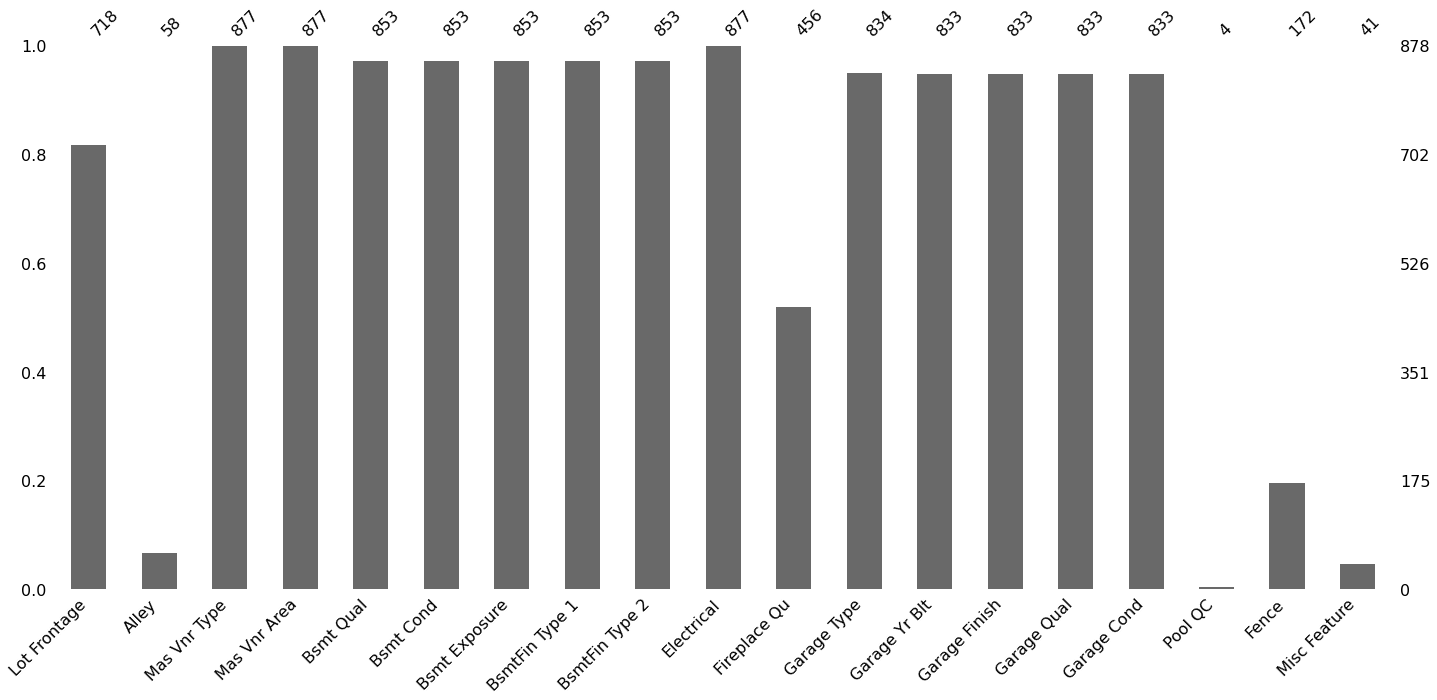

In [7]:
# display columns with missing values

print(f'Number of rows: {housing.shape[0]}')

missings = housing.columns[housing.isna().sum() > 0]

msno.bar(housing[missings]);

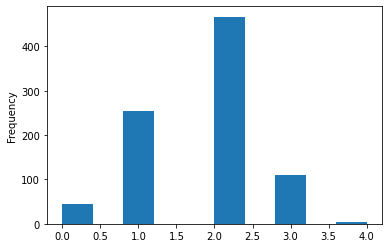

In [12]:
# check 'Garage Cars' - distribution

housing['Garage Cars'].plot(kind='hist');

**EDA--version 2**

In [8]:
# read in modified_test.csv

housing2 = pd.read_csv('./datasets/modified_test.csv')

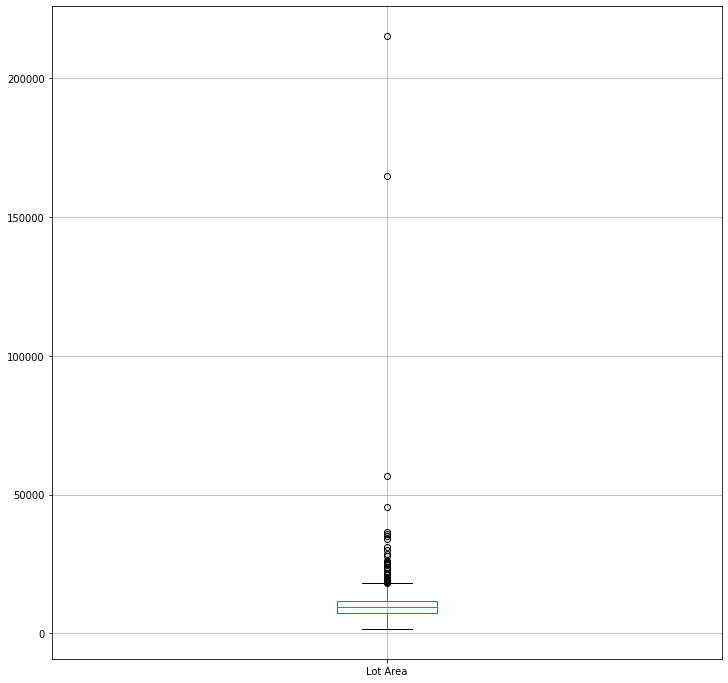

In [9]:
plt.figure(figsize=(12, 12))
housing2[['Lot Area']].boxplot();

In [10]:
housing2['Lot Area'].describe()

count       878.000000
mean      10307.033030
std       10002.674602
min        1477.000000
25%        7297.250000
50%        9446.000000
75%       11589.000000
max      215245.000000
Name: Lot Area, dtype: float64

In [ ]:
# check 'Garage Cars' distribution
